In [1]:
from tensorflow import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

C:\Users\glebm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\glebm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\glebm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def normalize_datasets(xs_train, xs_test, value=255.0):
    return (xs_train.reshape(xs_train.shape[0], 28, 28, 1) / value,
            xs_test.reshape(xs_test.shape[0], 28, 28, 1) / value)

mnist = keras.datasets.mnist
(xs_train, ys_train), (xs_test, ys_test) = mnist.load_data()
(xs_train, xs_test) = normalize_datasets(xs_train, xs_test)

In [3]:
def run_model(model, xs_train=xs_train, ys_train=ys_train, xs_test=xs_test, ys_test=ys_test):
    model.compile(optimizer='adagrad',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
    model.fit(xs_train, ys_train, epochs=3)
    _, test_acc = model.evaluate(xs_test, ys_test)
    return test_acc

In [5]:
simple_model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

run_model(simple_model)

Epoch 1/3
1875/1875 [==============================] - 20s 11ms/step - loss: 1.2834 - accuracy: 0.7325
Epoch 2/3
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5456 - accuracy: 0.8627
Epoch 3/3
313/313 [==============================] - 2s 4ms/step - loss: 0.3905 - accuracy: 0.8967


0.8967000246047974

In [6]:
doubled_model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

run_model(doubled_model)

Epoch 1/3
1875/1875 [==============================] - 43s 23ms/step - loss: 1.3241 - accuracy: 0.6966
Epoch 2/3
1875/1875 [==============================] - 49s 26ms/step - loss: 0.4630 - accuracy: 0.8753
Epoch 3/3
313/313 [==============================] - 3s 9ms/step - loss: 0.3175 - accuracy: 0.9118


0.9118000268936157

In [7]:
double_dense = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

run_model(double_dense)

Epoch 1/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.9871 - accuracy: 0.7864
Epoch 2/3
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4113 - accuracy: 0.8888
Epoch 3/3
313/313 [==============================] - 3s 8ms/step - loss: 0.3065 - accuracy: 0.9146


0.9146000146865845

In [8]:
no_maxpool = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

run_model(no_maxpool)

Epoch 1/3
1875/1875 [==============================] - 28s 14ms/step - loss: 0.8676 - accuracy: 0.8120
Epoch 2/3
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4082 - accuracy: 0.8900
Epoch 3/3
313/313 [==============================] - 2s 6ms/step - loss: 0.3232 - accuracy: 0.9119


0.911899983882904

In [9]:
doubled_dropout_model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

run_model(doubled_dropout_model)

Epoch 1/3
1875/1875 [==============================] - 60s 31ms/step - loss: 1.2937 - accuracy: 0.6457
Epoch 2/3
1875/1875 [==============================] - 56s 30ms/step - loss: 0.5773 - accuracy: 0.8303
Epoch 3/3
313/313 [==============================] - 3s 8ms/step - loss: 0.4040 - accuracy: 0.8898


0.8898000121116638

In [9]:
class ConfMatrix:
    
    def __init__(self, classes, model):
        self.classes = classes
        self.model = model
        self.matrix = [[0 for i in range(classes)] for j in range(classes)]
        self.pictures = [[(0, None) for i in range(classes)] for j in range(classes)]
        
    def add(self, obj, pred, y):
        res = max(pred)
        pred_class = pred.argmax(axis=0)
        #print(pred_class)
        exp_class = y
        self.matrix[exp_class][pred_class] += 1
        for i in range(len(pred)):
            res = pred[i]
            was, _ = self.pictures[exp_class][i]
            #print(was, res, pred)
            if was < res:
                self.pictures[exp_class][i] = (res, obj)
    
    def run_test(self, test, test_y):
        results = self.model.predict(test)
        for i in range(len(test)):
            if i % 1000 == 0:
                print("step", i)
            self.add(test[i], results[i], test_y[i])
            
    def show(self):
        for a in self.matrix:
            for n in a:
                print(n, end="\t")
            print("\n")
        f, ax = plt.subplots(nrows=self.classes, ncols=self.classes, figsize=(28, 28))
        for i in range(self.classes):
            a = self.pictures[i]
            for j in range(self.classes):
                p, img = a[j]
                if p == 0:
                    ax[i][j].imshow(np.zeros(shape=(28, 28)), cmap='gray')
                else:
                    ax[i][j].imshow(img.reshape(28, 28), cmap='gray')
        

In [10]:
cm = ConfMatrix(10, doubled_model)
cm.run_test(xs_test, ys_test)

step 0
step 1000
step 2000
step 3000
step 4000
step 5000
step 6000
step 7000
step 8000
step 9000


956	0	1	1	1	4	9	1	7	0	

0	1098	4	3	1	7	3	0	19	0	

12	1	908	9	19	2	17	19	43	2	

3	3	17	912	0	31	1	15	20	8	

1	1	3	0	907	0	21	2	6	41	

13	6	2	36	14	782	17	2	15	5	

13	8	4	1	14	26	887	1	4	0	

2	9	37	3	6	0	0	914	11	46	

8	6	3	20	9	18	8	14	876	12	

9	8	8	11	47	10	0	29	9	878	



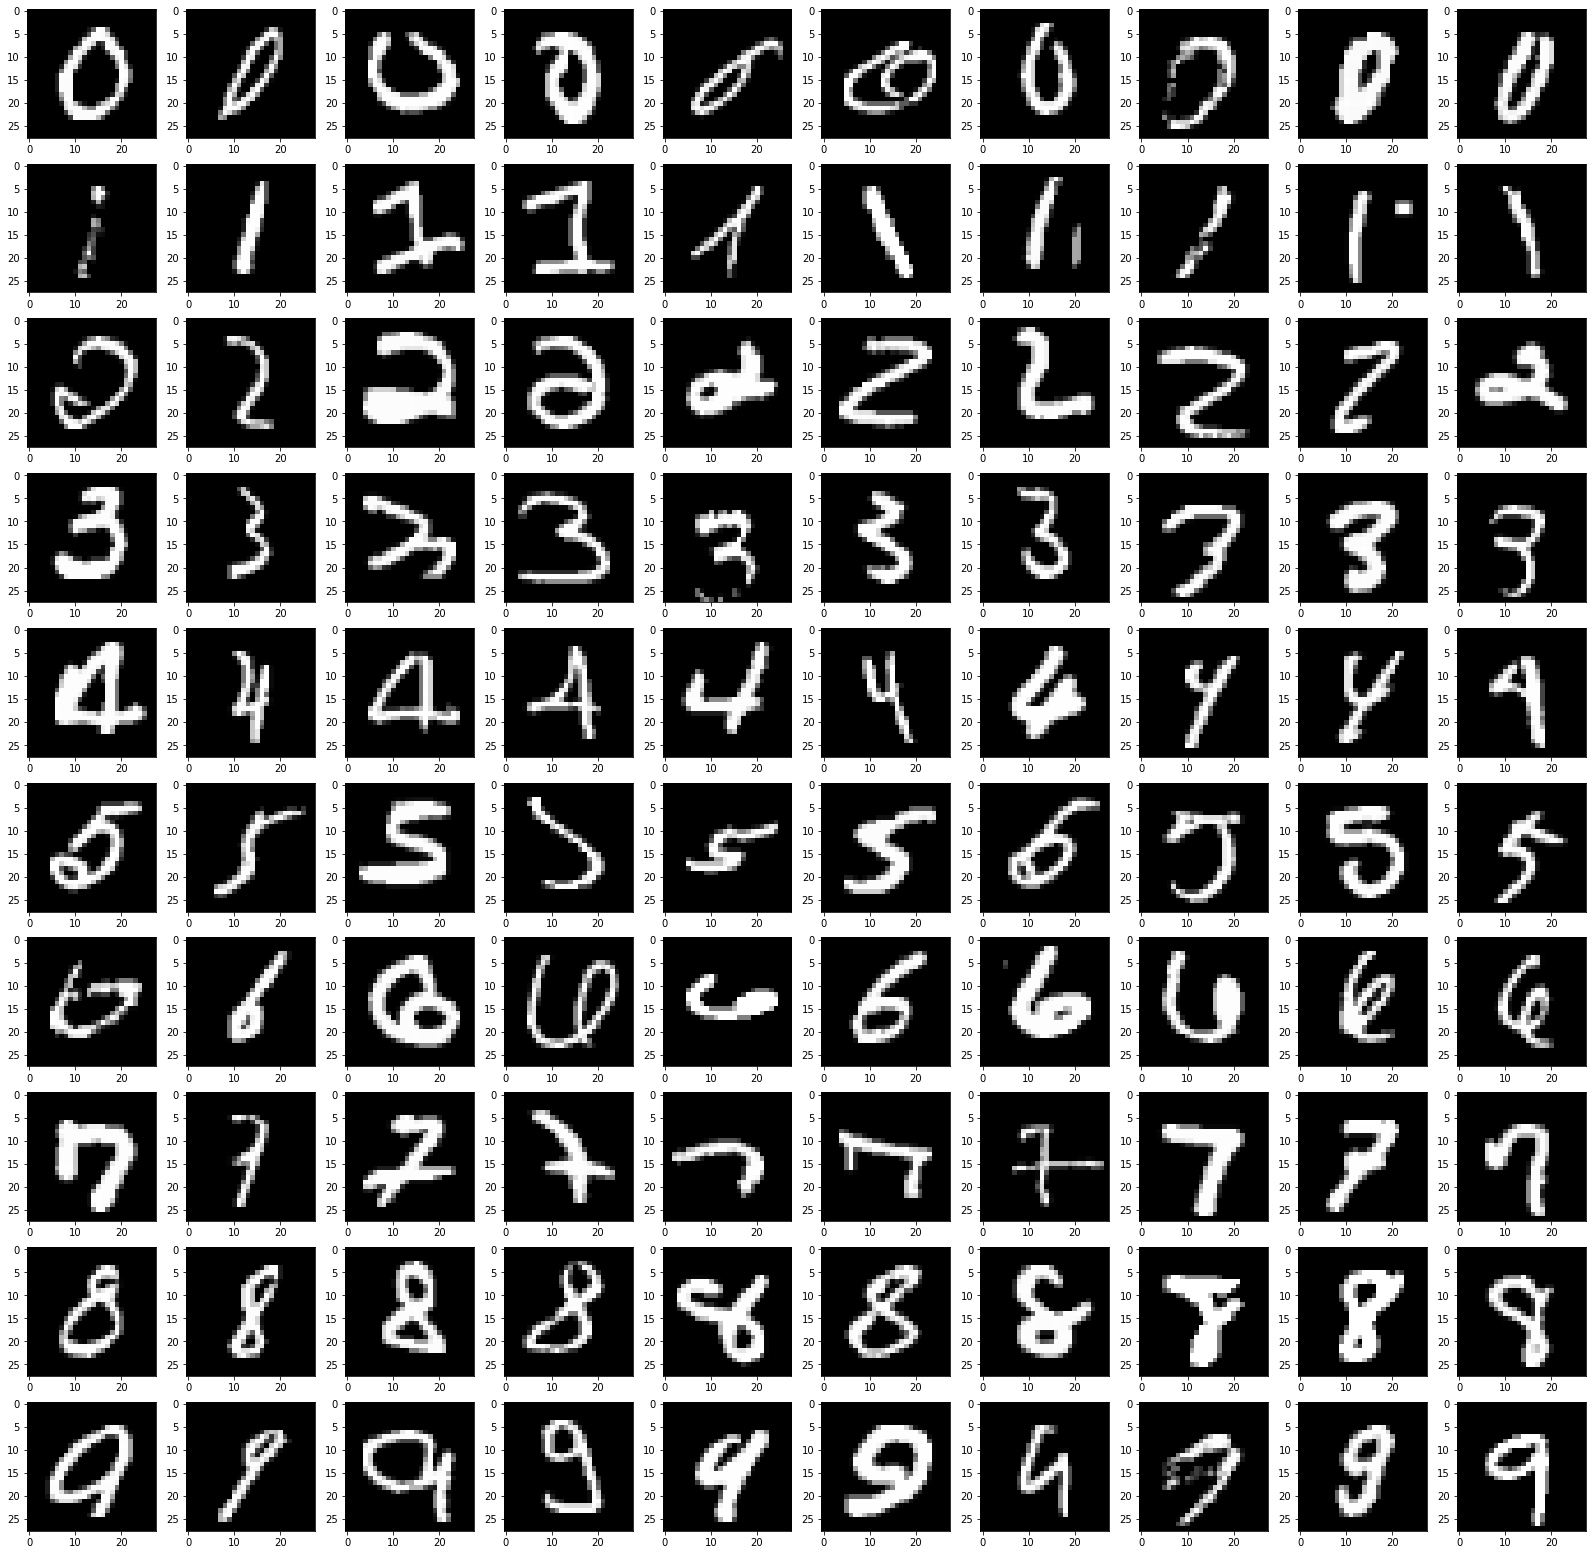

In [11]:
cm.show()

In [12]:
doubled_fashion_model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

fashion_mnist = keras.datasets.fashion_mnist
(f_xs_train, f_ys_train), (f_xs_test, f_ys_test) = fashion_mnist.load_data()
(f_xs_train, f_xs_test) = normalize_datasets(f_xs_train, f_xs_test)

run_model(doubled_fashion_model, f_xs_train, f_ys_train, f_xs_test, f_ys_test)

Epoch 1/3
1875/1875 [==============================] - 44s 23ms/step - loss: 1.4437 - accuracy: 0.5229
Epoch 2/3
1875/1875 [==============================] - 59s 32ms/step - loss: 0.8318 - accuracy: 0.7110
Epoch 3/3
313/313 [==============================] - 3s 8ms/step - loss: 0.7258 - accuracy: 0.7442


0.7441999912261963

step 0
step 1000
step 2000
step 3000
step 4000
step 5000
step 6000
step 7000
step 8000
step 9000
736	10	22	100	16	6	92	0	18	0	

2	893	4	61	22	0	16	0	2	0	

8	2	479	11	257	1	229	0	13	0	

60	17	7	776	56	1	78	0	3	2	

3	3	132	52	700	1	100	0	9	0	

0	1	0	4	0	812	0	123	4	56	

183	3	169	77	198	1	345	0	24	0	

0	0	0	0	0	46	0	857	3	94	

1	2	38	10	11	8	23	6	899	2	

0	1	0	0	1	4	0	48	1	945	



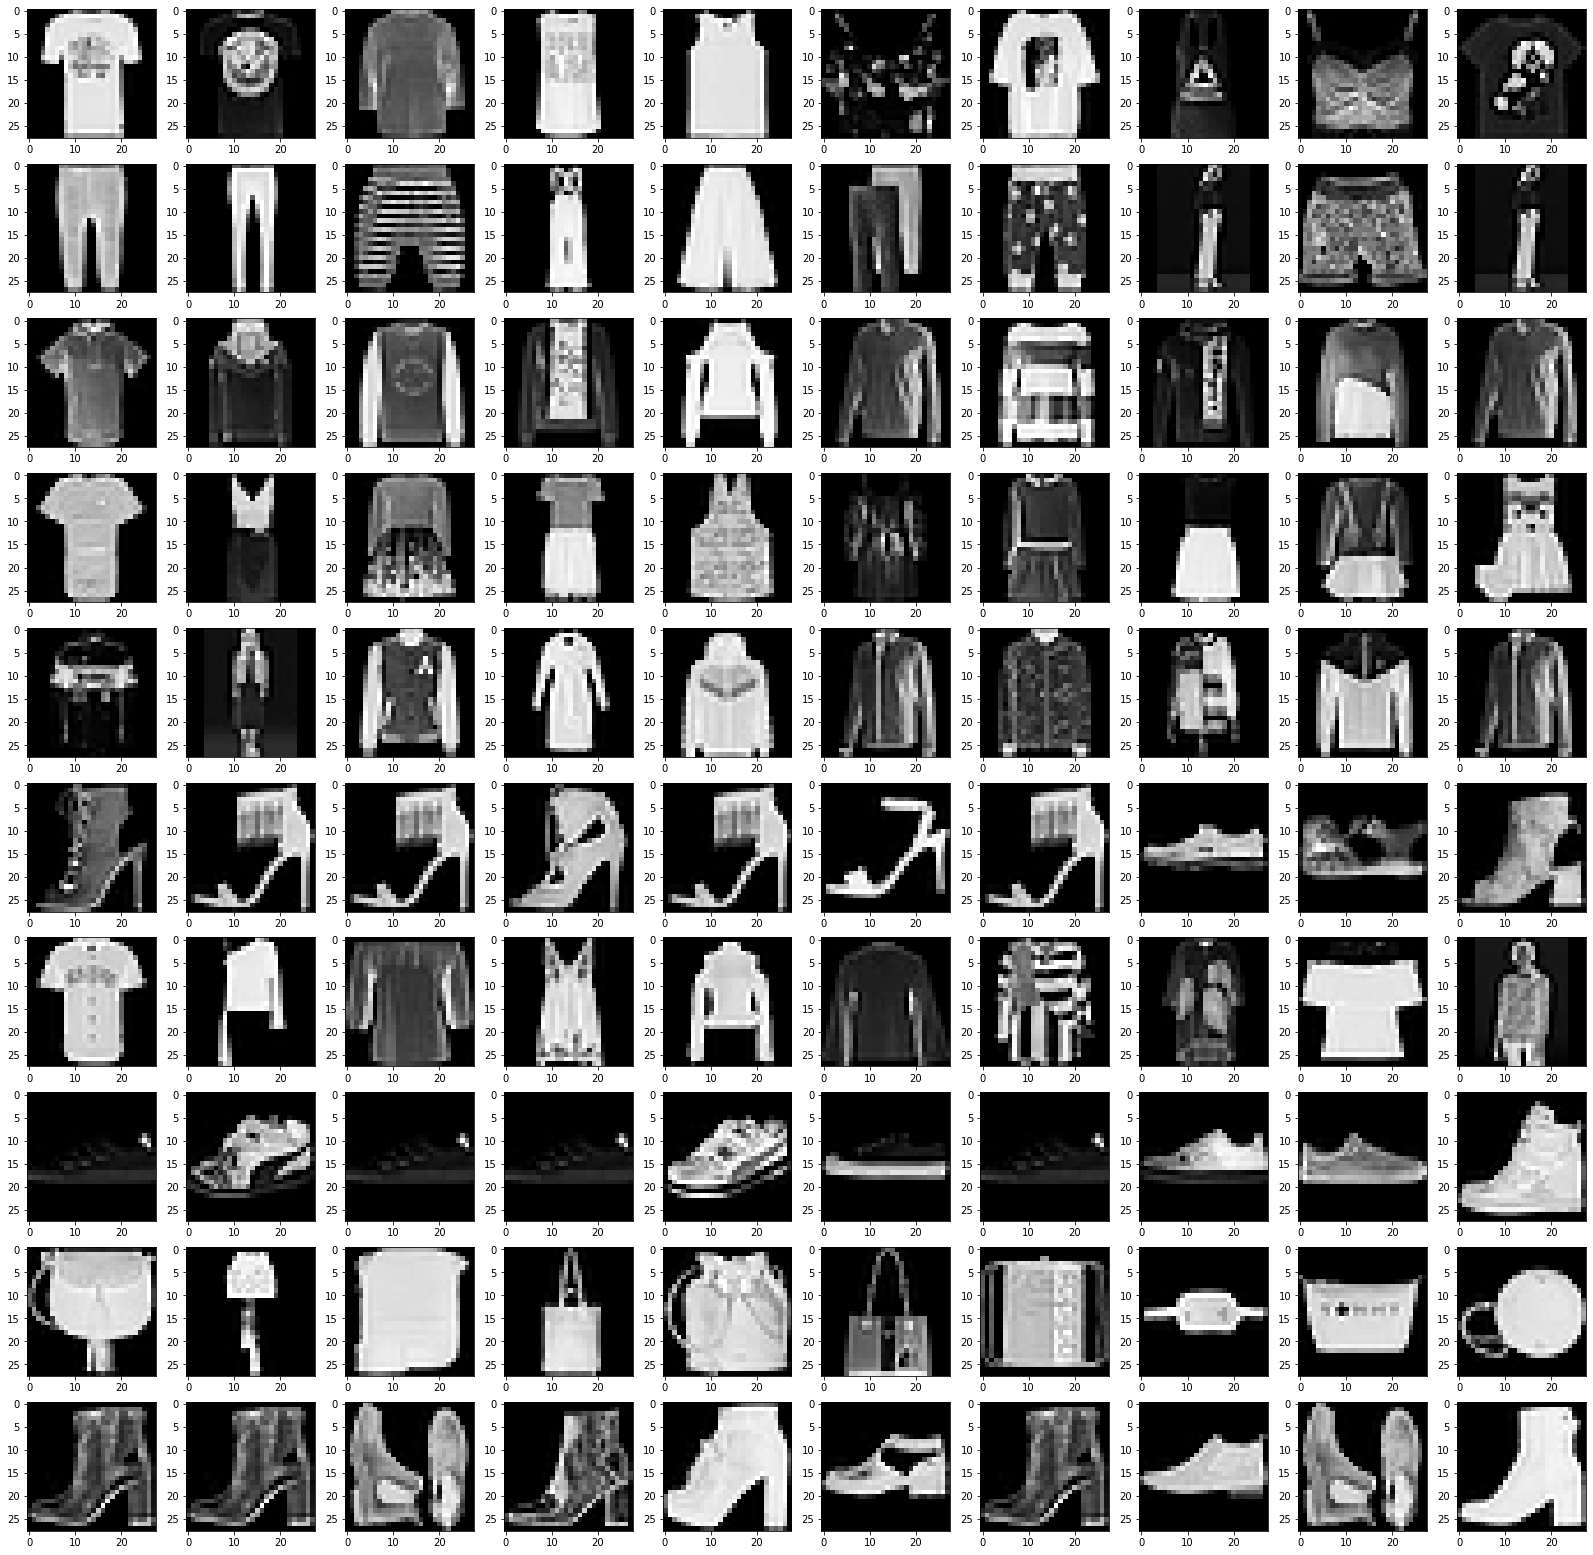

In [13]:
cm = ConfMatrix(10, doubled_fashion_model)
cm.run_test(f_xs_test, f_ys_test)
cm.show()